<a href="https://colab.research.google.com/github/nakajinbee/study-ai/blob/main/gemstone_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score


In [8]:
data = pd.read_csv("/content/cubic_zirconia.csv")

In [9]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [10]:
data.shape

(26967, 11)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [12]:
data.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

In [13]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


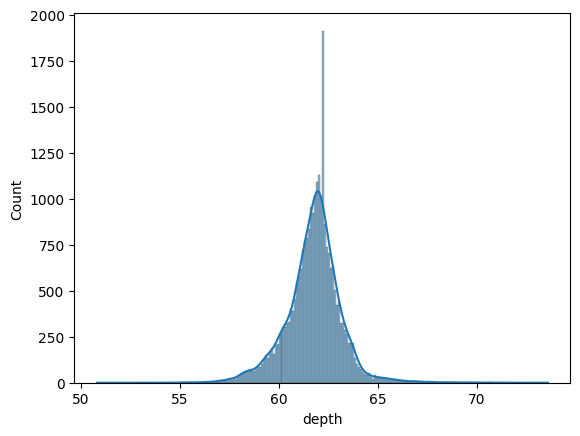

In [14]:
sns.histplot(data=data,x="depth",kde=True)
plt.show()

In [15]:
# 欠損値を埋めたことがわかるようにカラムを追加
data["depth_missing_before"] = data["depth"].isnull()

depth_mean = data["depth"].mean()
data["depth"].fillna(depth_mean,inplace=True)

In [16]:
data.isnull().sum()

Unnamed: 0              0
carat                   0
cut                     0
color                   0
clarity                 0
depth                   0
table                   0
x                       0
y                       0
z                       0
price                   0
depth_missing_before    0
dtype: int64

**体積 (Volume):** ダイヤモンドの体積は、その三つの寸法 (x、y、z) を掛け合わせて計算されます。体積の計算式は: 体積 = x * y * z です。この特徴量はダイヤモンドの全体的なサイズに関する情報を提供します。

**密度 (Density):** 密度は、カラット重量とダイヤモンドの体積の両方から導かれます。密度の計算式は: 密度 = カラット重量 / 体積 です。この特徴量はダイヤモンドの重量がどのようにサイズに分布しているかを理解するのに役立ちます。

**テーブル割合 (Table Percentage):** テーブル割合は、テーブル（ダイヤモンドの上部にある平らな面）の直径とダイヤモンドの平均直径の比率です。テーブル割合の計算式は: テーブル割合 = (テーブル / ((x + y) / 2)) * 100 です。この特徴量はダイヤモンドの上部の面が全体のサイズに対してどのくらいの割合を占めるかを示します。

**深さ割合 (Depth Percentage):** 深さ割合は、深さ（テーブルから底部のカレットまでの距離）とダイヤモンドの平均直径の比率です。深さ割合の計算式は: 深さ割合 = (深さ / ((x + y) / 2)) * 100 です。この特徴量はダイヤモンドの深さが全体のサイズに対してどのくらいの割合を占めるかを示します。

**対称性 (Symmetry):** 対称性は、ダイヤモンドの最長と最短の軸の長さの差を三つの軸の平均長さで割って計算されます。対称性の計算式は: 対称性 = (abs(x - z) + abs(y - z)) / (x + y + z) です。この特徴量はダイヤモンドの視覚的な対称性を示します。

**表面積 (Surface Area):** ダイヤモンドの表面積は、次の式で計算されます: 表面積 = 2 * ((x * y) + (x * z) + (y * z))。この特徴量はダイヤモンドの全ての面の総面積を示します。

**深さとテーブルの比率 (Depth to Table Ratio):** とテーブルの比率は、深さをテーブルで割ったものです。深さとテーブルの比率の計算式は: 深さとテーブルの比率 = 深さ / テーブル です。この特徴量はダイヤモンドの比率に関する情報を提供します。

In [17]:
    data['volume'] = data['x'] * data['y'] * data['z']
    data['density'] = data['carat'] / data['volume']
    data['table_percentage'] = (data['table'] / ((data['x'] + data['y']) / 2)) * 100
    data['depth_percentage'] = (data['depth'] / ((data['x'] + data['y']) / 2)) * 100
    data['symmetry'] = (abs(data['x'] - data['z']) + abs(data['y'] - data['z'])) / (data['x'] + data['y'] + data['z'])
    data['surface_area'] = 2 * ((data['x'] * data['y']) + (data['x'] * data['z']) + (data['y'] * data['z']))
    data['depth_to_table_ratio'] = data['depth'] / data['table']


In [18]:
#　自分で作成した特徴量を平均値で埋めても問題ないのか？？

# 欠損値を埋めたことがわかるようにカラムを追加
data["symmetry_before"] = data["symmetry"].isnull()


symmetry_mean = data["symmetry"].mean()
data["symmetry"].fillna(symmetry_mean,inplace=True)

In [19]:
data.isnull().sum()

Unnamed: 0              0
carat                   0
cut                     0
color                   0
clarity                 0
depth                   0
table                   0
x                       0
y                       0
z                       0
price                   0
depth_missing_before    0
volume                  0
density                 0
table_percentage        0
depth_percentage        0
symmetry                0
surface_area            0
depth_to_table_ratio    0
symmetry_before         0
dtype: int64

データの分布を確認する: データセット全体でのテーブル割合と深さとテーブルの比率の分布を確認してください。もし分布に大きな偏りや外れ値がある場合、平均値で埋めることが結果を歪める可能性があります。

ドメイン知識を活用する: テーブル割合や深さとテーブルの比率がダイヤモンドの特性に関連している場合、平均値で埋める代わりに、より適切な埋め方を考慮することを検討してください。たとえば、カットの質や形状によって変わる可能性がある場合、異なるカテゴリごとに埋める方法も考慮できます。

欠損のメカニズムを理解する: 欠損がランダムに発生しているのか、ある特定のパターンに従っているのかを理解することも重要です。もし欠損が特定の条件に基づいている場合、その条件に応じて適切な埋め方を選択することが考慮されるべきです。

交差検証を検討する: モデルのパフォーマンスを検証する際、異なる欠損値埋め方法の影響を評価するために交差検証を使用することを検討してください。異なる方法で欠損値を埋めた場合のモデルのパフォーマンスを比較し、最適な選択肢を見つけることが有益です。



前処理
→欠損値（depthに存在）を平均値で埋めた。

In [20]:
data.describe()

,Unnamed: 0,carat,depth,table,x,y,z,price,volume,density,table_percentage,depth_percentage,symmetry,surface_area,depth_to_table_ratio
count,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000,2.696700e+04,2.696700e+04,2.696700e+04,26967.000000,26967.000000,26967.000000
mean,13484.000000,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115,129.995827,inf,inf,inf,0.292621,152.472018,1.076500
std,7784.846691,0.477745,1.394481,2.232068,1.128516,1.166058,0.720624,4024.864666,80.420430,NaN,NaN,NaN,0.018081,61.180287,0.052822
min,1.000000,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000,0.000000,5.207522e-04,1.701747e+02,1.758471e+02,0.004633,0.000000,0.752857
25%,6742.500000,0.400000,61.100000,56.000000,4.710000,4.710000,2.900000,945.000000,64.774944,6.048055e-03,8.774584e+02,9.379728e+02,0.285601,99.380800,1.046528
50%,13484.000000,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000,114.640110,6.116933e-03,1.018519e+03,1.090114e+03,0.291485,145.516000,1.082456
75%,20225.500000,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000,171.370890,6.189592e-03,1.212789e+03,1.314715e+03,0.298474,190.343500,1.112281
max,26967.000000,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000,3840.598060,inf,inf,inf,1.267649,2032.880800,1.350000


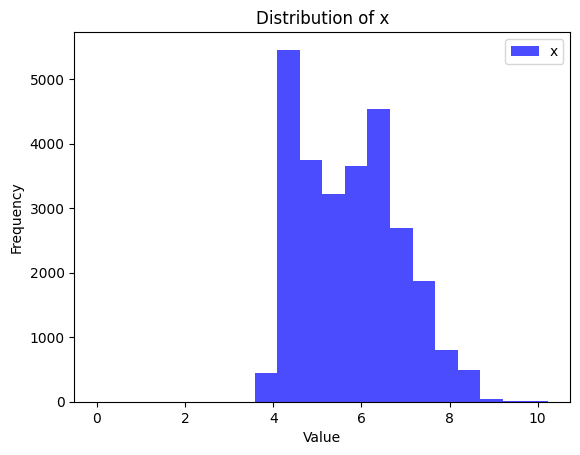

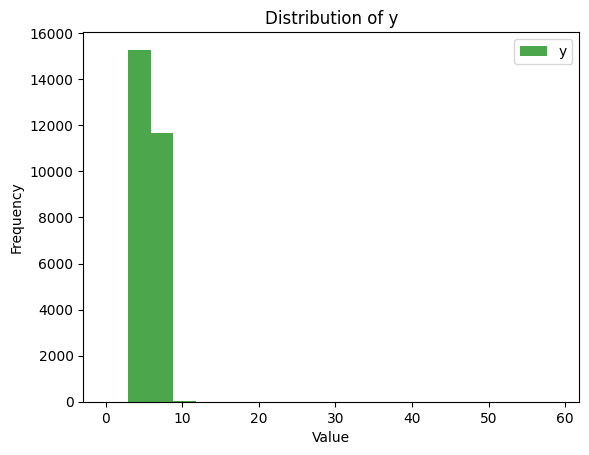

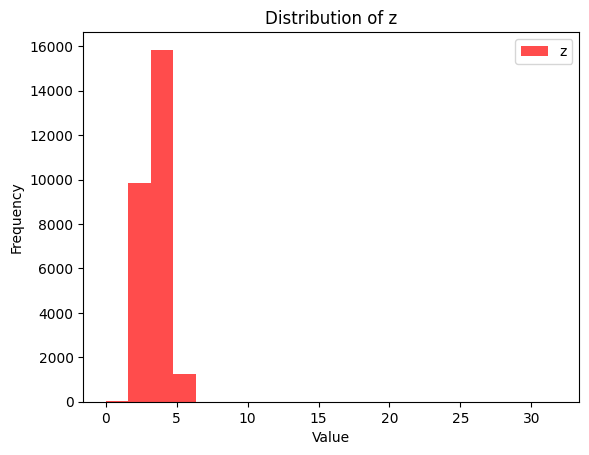

In [21]:
# カラム x のヒストグラム
plt.hist(data['x'], bins=20, color='blue', alpha=0.7, label='x')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of x')
plt.legend()
plt.show()

# カラム y のヒストグラム
plt.hist(data['y'], bins=20, color='green', alpha=0.7, label='y')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of y')
plt.legend()
plt.show()

# カラム z のヒストグラム
plt.hist(data['z'], bins=20, color='red', alpha=0.7, label='z')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of z')
plt.legend()
plt.show()

In [22]:
# 各カラムの最大値を計算
max_values = data.max()

# INFを含むカラムを抽出
columns_with_inf = max_values[max_values == np.inf].index

print(columns_with_inf)

Index(['density', 'table_percentage', 'depth_percentage'], dtype='object')


In [23]:
# 各行の最大値を計算
max_values_per_row = data.max(axis=1)

# INFを含む行を抽出
rows_with_inf = data[max_values_per_row == np.inf]

print(rows_with_inf)

       Unnamed: 0  carat      cut color clarity  depth  table     x     y  \
5821         5822   0.71     Good     F     SI2   64.1   60.0  0.00  0.00   
6034         6035   2.02  Premium     H     VS2   62.7   53.0  8.02  7.95   
6215         6216   0.71     Good     F     SI2   64.1   60.0  0.00  0.00   
10827       10828   2.20  Premium     H     SI1   61.2   59.0  8.42  8.37   
12498       12499   2.18  Premium     H     SI2   59.4   61.0  8.49  8.45   
12689       12690   1.10  Premium     G     SI2   63.0   59.0  6.50  6.47   
17506       17507   1.14     Fair     G     VS1   57.5   67.0  0.00  0.00   
18194       18195   1.01  Premium     H      I1   58.1   59.0  6.66  6.60   
23758       23759   1.12  Premium     G      I1   60.4   59.0  6.71  6.67   

         z  price  depth_missing_before  volume  density  table_percentage  \
5821   0.0   2130                 False     0.0      inf               inf   
6034   0.0  18207                 False     0.0      inf        663.74452

<ipython-input-23-add0a5ef5dfe>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  max_values_per_row = data.max(axis=1)


In [27]:
data = data.drop(rows_with_inf.index)
data.drop(["Unnamed: 0","x","y","z"],axis=1,inplace=True)

In [30]:
data.describe()

,carat,depth,table,price,volume,density,table_percentage,depth_percentage,symmetry,surface_area,depth_to_table_ratio
count,26958.000000,26958.000000,26958.000000,26958.000000,26958.000000,26958.000000,26958.000000,26958.000000,26958.000000,26958.000000,26958.000000
mean,0.798190,61.745340,57.455342,3938.311262,130.039226,0.006127,1039.362391,1118.669824,0.292463,152.497938,1.076516
std,0.477602,1.394016,2.231227,4023.359737,80.398762,0.000196,195.577558,216.020239,0.014685,61.165213,0.052802
min,0.200000,50.800000,49.000000,326.000000,32.243239,0.000521,170.174653,175.847141,0.004633,62.347000,0.752857
25%,0.400000,61.100000,56.000000,945.000000,64.777280,0.006048,877.458396,937.984496,0.285601,99.414200,1.046528
50%,0.700000,61.800000,57.000000,2375.000000,114.647664,0.006117,1018.518519,1090.176938,0.291484,145.539700,1.082456
75%,1.050000,62.500000,59.000000,5358.000000,171.374940,0.006189,1212.789416,1314.715360,0.298472,190.362050,1.112281
max,4.500000,73.600000,79.000000,18818.000000,3840.598060,0.022647,1696.658098,1702.013423,1.267649,2032.880800,1.350000


<Axes: >

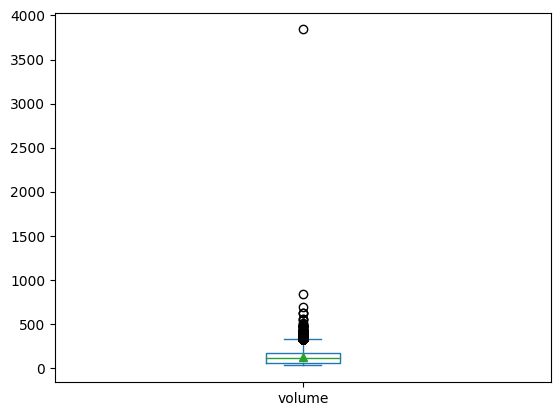

In [220]:
data.plot.box(column="volume",showmeans=True)

In [31]:
data["cut"].value_counts()

Ideal        10816
Premium       6893
Very Good     6030
Good          2439
Fair           780
Name: cut, dtype: int64

## cut, color, clarityをダミー変数化する必要がある。

**順序がある**！！

In [32]:
# Describe the cut quality of the cubic zirconia. Quality is increasing order Fair, Good, Very Good, Premium, Ideal.
data["cut"].unique()

array(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], dtype=object)

In [33]:
# Colour of the cubic zirconia.With D being the best and J the worst.
data["color"].unique()

array(['E', 'G', 'F', 'D', 'H', 'J', 'I'], dtype=object)

In [34]:
# cubic zirconia Clarity refers to the absence of the Inclusions and Blemishes.
#  (In order from Best to Worst, FL = flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3
data["clarity"].unique()

array(['SI1', 'IF', 'VVS2', 'VS1', 'VVS1', 'VS2', 'SI2', 'I1'],
      dtype=object)

In [35]:
# カテゴリカル変数を順序情報に対応させる辞書を作成
cut_mapping = {'Ideal': 4, 'Premium': 3, 'Very Good': 2, 'Good': 1, 'Fair': 0}
color_mapping = {'D': 6, 'E': 5, 'F': 4, 'G': 3, 'H': 2, 'I': 1, 'J': 0}
clarity_mapping = {'FL': 9, 'IF': 9, 'VVS1': 7, 'VVS2': 7, 'VS1': 5, 'VS2': 5, 'SI1': 3, 'SI2': 3, 'I1': 1}

# ダミー変数化前のデータに新しい列として追加
data['cut_encoded'] = data['cut'].map(cut_mapping)
data['color_encoded'] = data['color'].map(color_mapping)
data['clarity_encoded'] = data['clarity'].map(clarity_mapping)

# ダミー変数化を行ったデータ
data_encoded = pd.get_dummies(data, columns=['cut_encoded', 'color_encoded', 'clarity_encoded'])

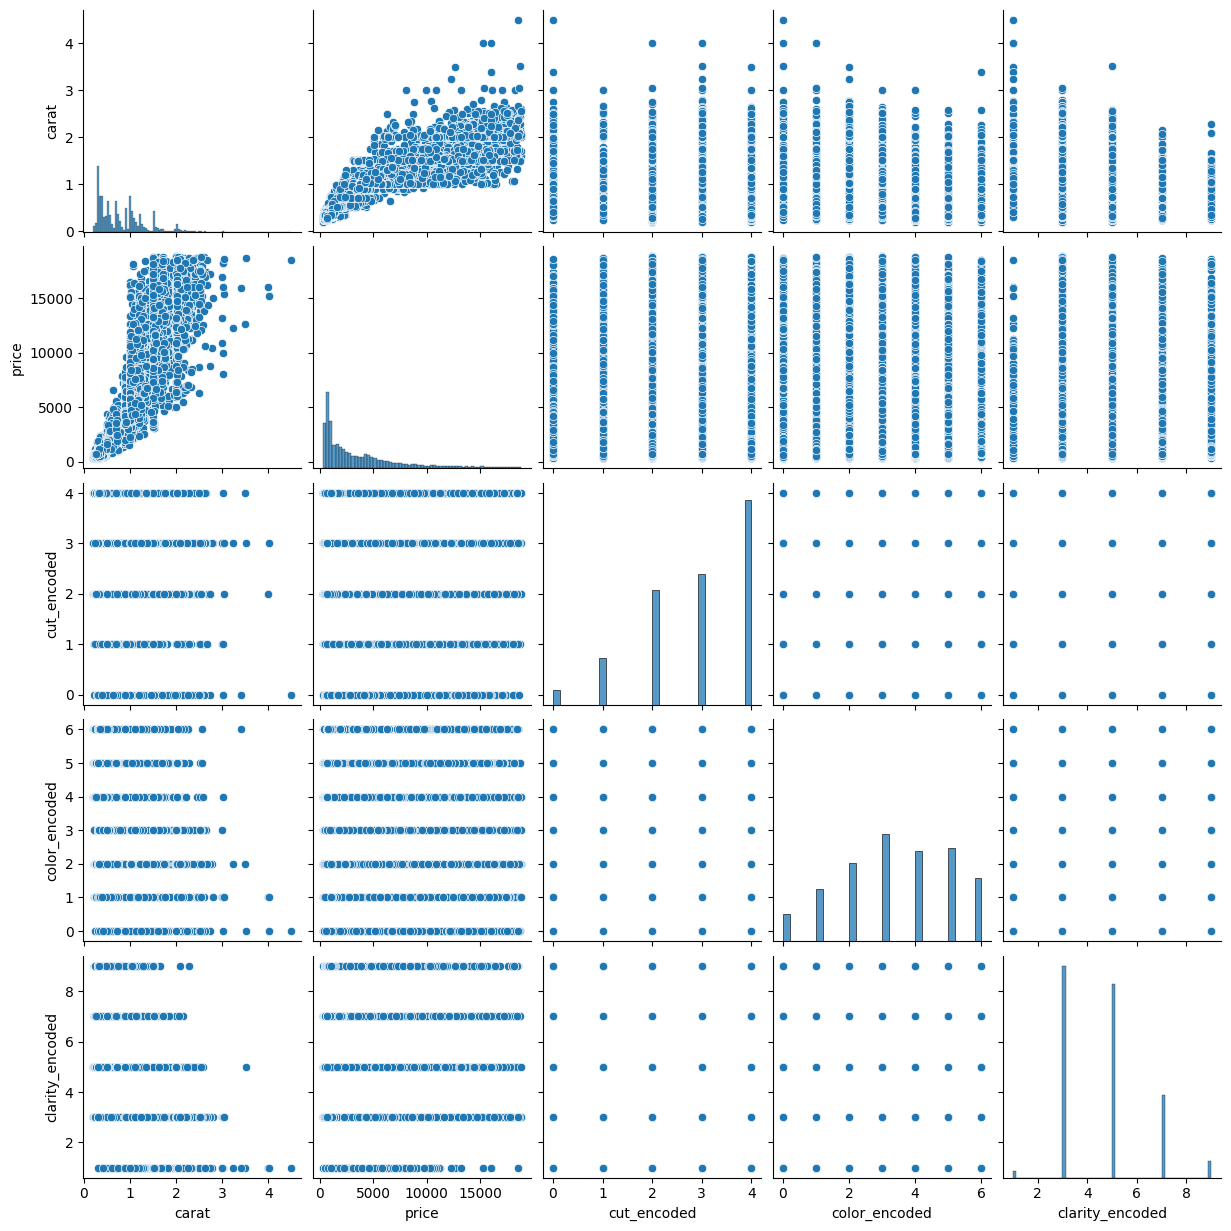

In [42]:
# 特定のカラムを抽出してプロットするデータフレームを作成
selected_columns = ["carat","price",'cut_encoded', 'color_encoded', 'clarity_encoded']
selected_data = data[selected_columns]

# pairplotを作成
sns.pairplot(selected_data)
plt.show()

In [43]:
data_encoded.head()

,carat,cut,color,clarity,depth,table,price,depth_missing_before,volume,density,...,color_encoded_2,color_encoded_3,color_encoded_4,color_encoded_5,color_encoded_6,clarity_encoded_1,clarity_encoded_3,clarity_encoded_5,clarity_encoded_7,clarity_encoded_9
0,0.30,Ideal,E,SI1,62.1,58.0,499,False,48.726678,0.006157,...,0,0,0,1,0,0,1,0,0,0
1,0.33,Premium,G,IF,60.8,58.0,984,False,53.225640,0.006200,...,0,1,0,0,0,0,0,0,0,1
2,0.90,Very Good,E,VVS2,62.2,60.0,6289,False,139.726944,0.006441,...,0,0,0,1,0,0,0,0,1,0
3,0.42,Ideal,F,VS1,61.6,56.0,1082,False,68.482560,0.006133,...,0,0,1,0,0,0,0,1,0,0
4,0.31,Ideal,F,VVS1,60.4,59.0,779,False,51.066825,0.006070,...,0,0,1,0,0,0,0,0,1,0


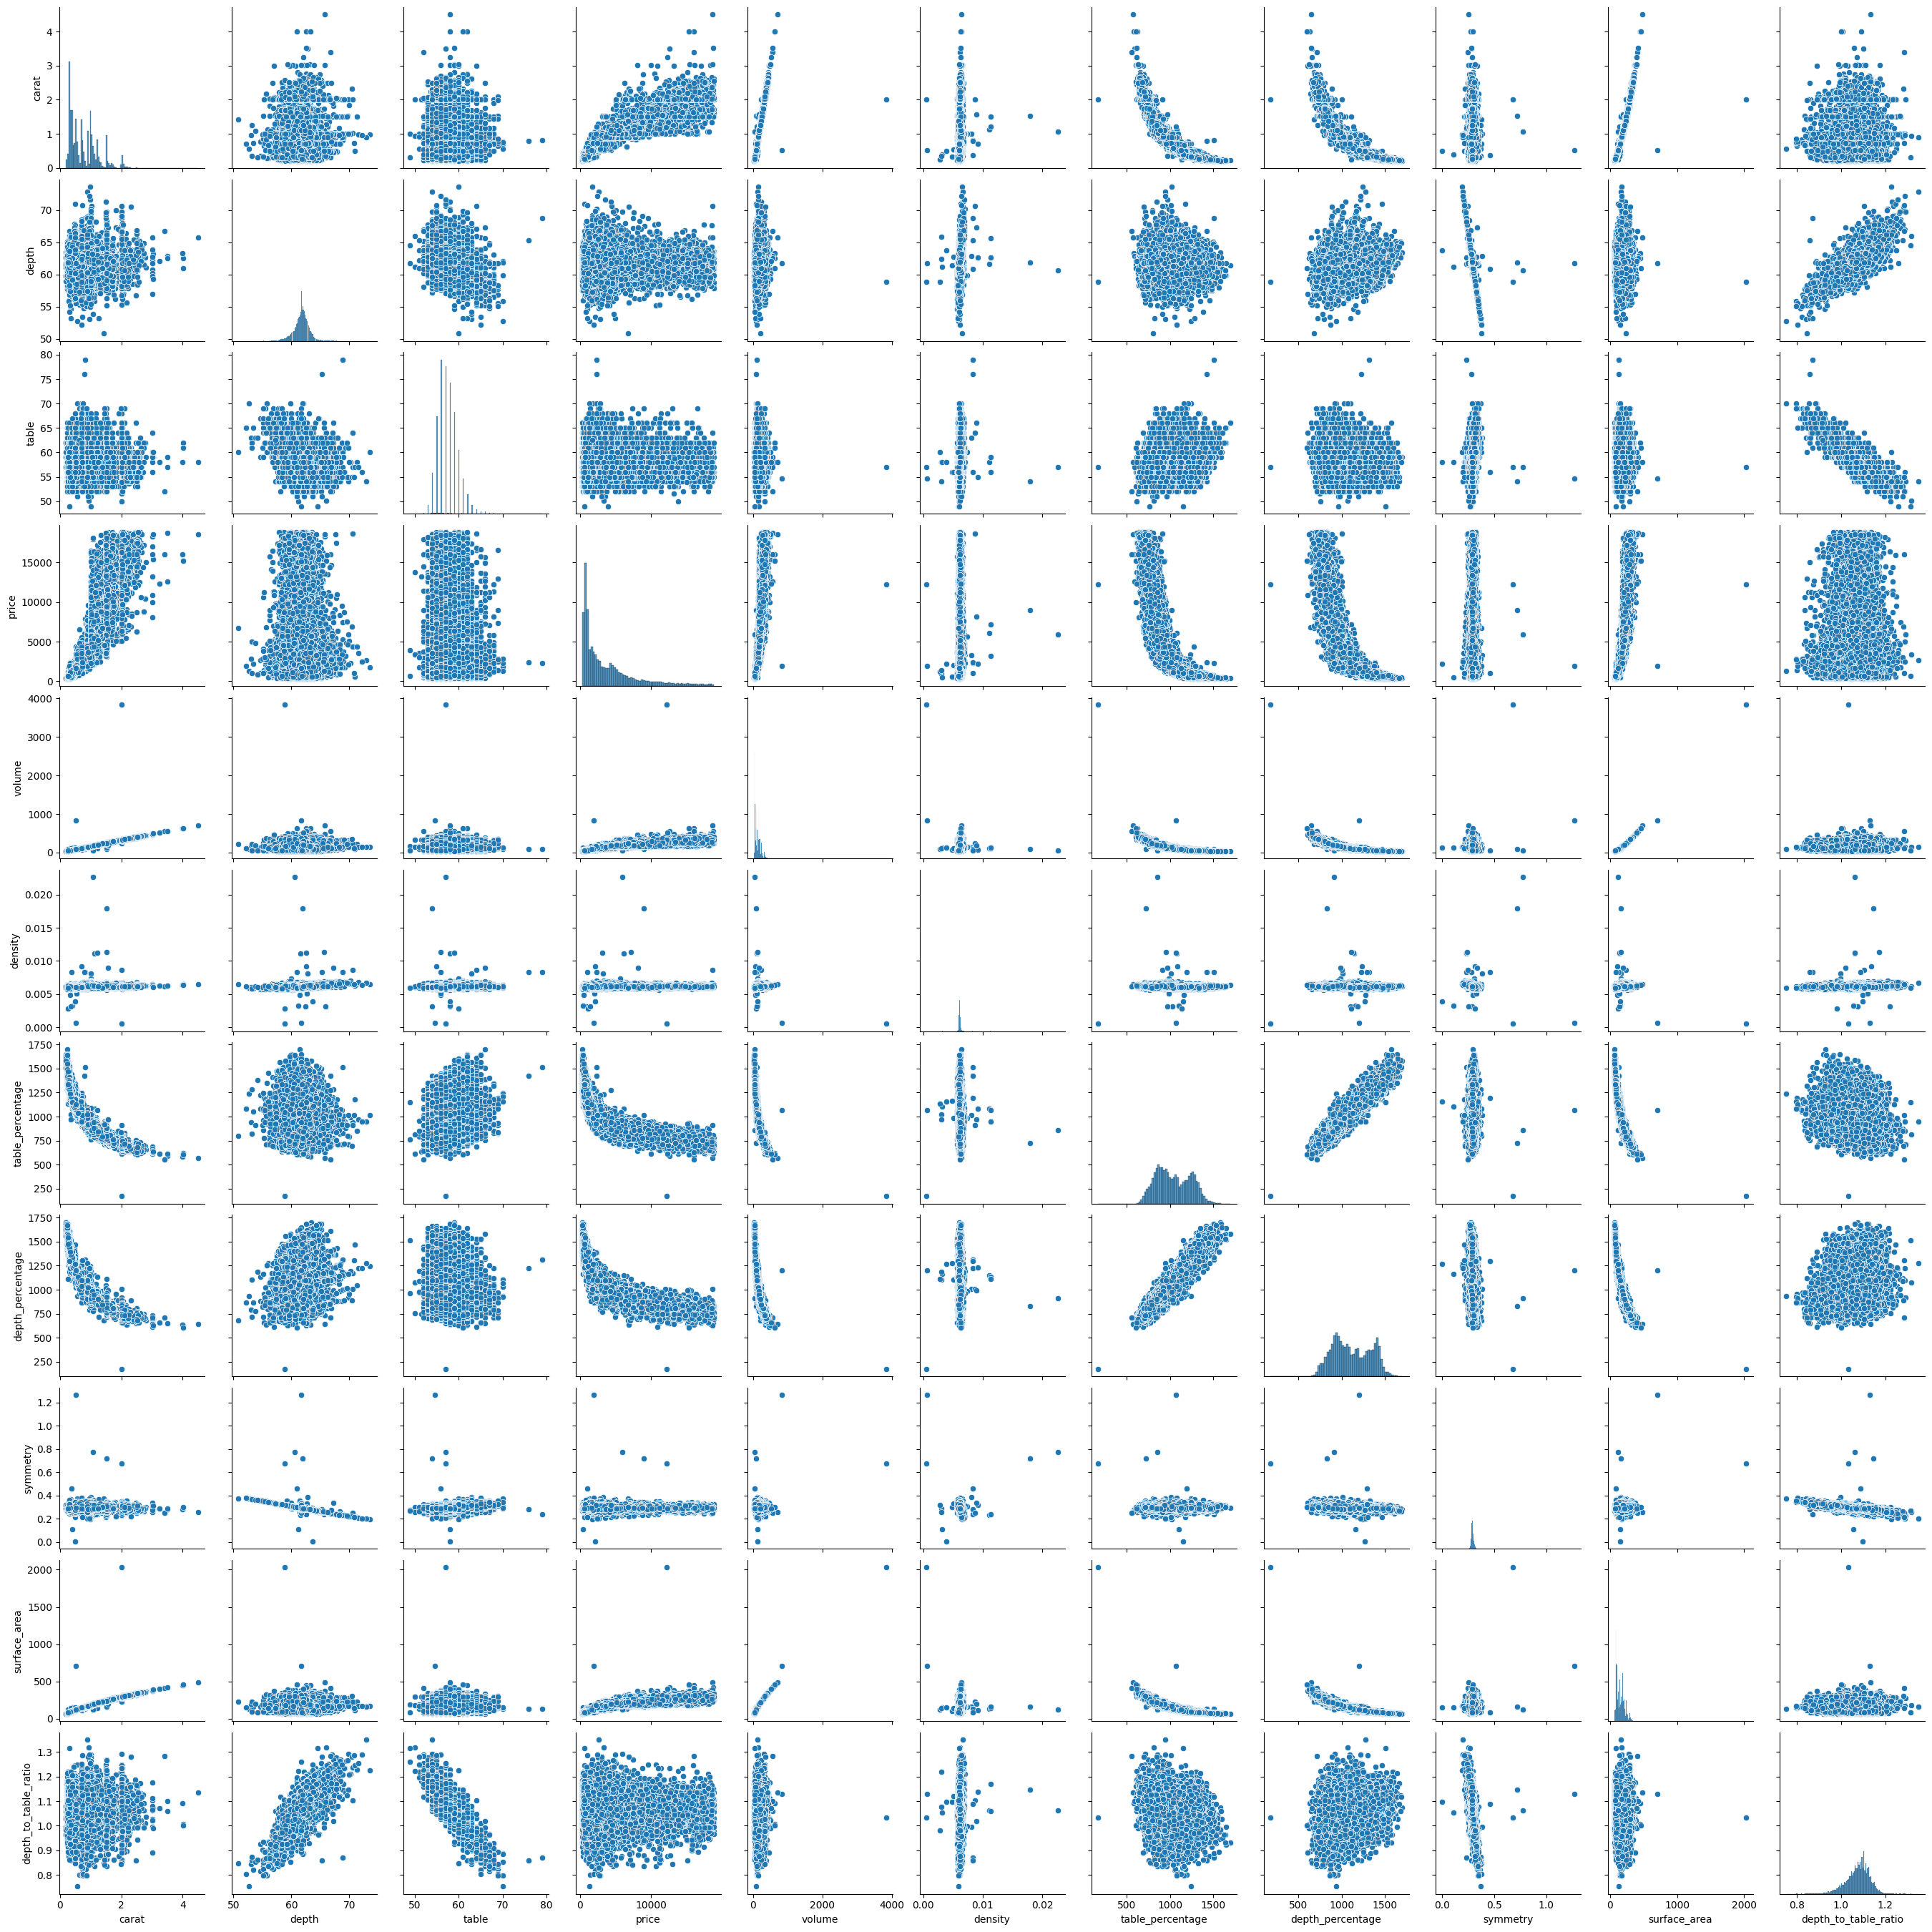

In [39]:
# 特定のカラムを抽出してプロットするデータフレームを作成
selected_columns = ["carat","cut","color","clarity","depth","table","price","volume","density","table_percentage","depth_percentage","symmetry","surface_area","depth_to_table_ratio"]
selected_data = data_encoded[selected_columns]

# pairplotを作成
sns.pairplot(selected_data)
plt.show()

In [44]:
data.corr()

<ipython-input-44-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,carat,depth,table,price,depth_missing_before,volume,density,table_percentage,depth_percentage,symmetry,surface_area,depth_to_table_ratio,symmetry_before,cut_encoded,color_encoded,clarity_encoded
carat,1.000000,0.035207,0.181669,0.922409,0.004954,0.961147,0.192298,-0.908330,-0.914879,-0.025467,0.977155,-0.125943,NaN,-0.140658,-0.293830,-0.330138
depth,0.035207,1.000000,-0.293703,-0.002349,-0.000023,0.013780,0.273680,-0.042649,0.126446,-0.833106,0.009617,0.674053,NaN,-0.211952,-0.050512,-0.073393
table,0.181669,-0.293703,1.000000,0.127088,0.000244,0.164303,0.227590,0.004603,-0.226984,0.250666,0.176689,-0.901849,NaN,-0.442959,-0.024384,-0.152055
price,0.922409,-0.002349,0.127088,1.000000,0.002406,0.889015,0.133582,-0.812443,-0.814980,0.005830,0.896025,-0.101801,NaN,-0.060306,-0.173036,-0.132233
depth_missing_before,0.004954,-0.000023,0.000244,0.002406,1.000000,0.006733,-0.006591,-0.001811,-0.001848,0.018870,0.006243,-0.000789,NaN,-0.001915,-0.014889,-0.006457
volume,0.961147,0.013780,0.164303,0.889015,0.006733,1.000000,0.092300,-0.880550,-0.886495,0.050359,0.990498,-0.122215,NaN,-0.122094,-0.282143,-0.314125
density,0.192298,0.273680,0.227590,0.133582,-0.006591,0.092300,1.000000,-0.131137,-0.144794,-0.140685,0.121214,-0.053020,NaN,-0.250376,-0.054582,-0.146770
table_percentage,-0.908330,-0.042649,0.004603,-0.812443,-0.001811,-0.880550,-0.131137,1.000000,0.966038,0.029473,-0.928814,-0.021330,NaN,0.052761,0.248455,0.340587
depth_percentage,-0.914879,0.126446,-0.226984,-0.814980,-0.001848,-0.886495,-0.144794,0.966038,1.000000,-0.112260,-0.936704,0.233302,NaN,0.115516,0.239705,0.353697
symmetry,-0.025467,-0.833106,0.250666,0.005830,0.018870,0.050359,-0.140685,0.029473,-0.112260,1.000000,0.041787,-0.565734,NaN,0.174768,0.045058,0.060397


In [45]:
data.corr()["price"].sort_values(ascending=False)

<ipython-input-45-a3251689b926>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()["price"].sort_values(ascending=False)


price                   1.000000
carat                   0.922409
surface_area            0.896025
volume                  0.889015
density                 0.133582
table                   0.127088
symmetry                0.005830
depth_missing_before    0.002406
depth                  -0.002349
cut_encoded            -0.060306
depth_to_table_ratio   -0.101801
clarity_encoded        -0.132233
color_encoded          -0.173036
table_percentage       -0.812443
depth_percentage       -0.814980
symmetry_before              NaN
Name: price, dtype: float64

'volume'と'surface_area'の相関係数が0.990341と非常に高いです。

'table_percentage'と'depth_percentage'の相関係数が-0.928424と非常に高いです。

多重共線性の観点から注意が必要なのは、相関が非常に高い特徴量の組み合わせです。特に相関係数が0.9以上（またはVIFが10以上）の特徴量は、モデルの安定性や特徴量の重要度の評価に影響を及ぼす可能性があります。必要に応じて、多重共線性を軽減するための対策を検討することが大切です。

In [227]:
data.columns.values

array(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price',
       'depth_missing_before', 'volume', 'density', 'table_percentage',
       'depth_percentage', 'symmetry', 'surface_area',
       'depth_to_table_ratio', 'symmetry_before'], dtype=object)

In [228]:
data.head()

,carat,cut,color,clarity,depth,table,price,depth_missing_before,volume,density,table_percentage,depth_percentage,symmetry,surface_area,depth_to_table_ratio,symmetry_before
0,0.30,Ideal,E,SI1,62.1,58.0,499,False,48.726678,0.006157,1355.140187,1450.934579,0.288770,82.1758,1.070690,False
1,0.33,Premium,G,IF,60.8,58.0,984,False,53.225640,0.006200,1306.306306,1369.369369,0.300518,87.3784,1.048276,False
2,0.90,Very Good,E,VVS2,62.2,60.0,6289,False,139.726944,0.006441,986.842105,1023.026316,0.288582,165.8592,1.036667,False
3,0.42,Ideal,F,VS1,61.6,56.0,1082,False,68.482560,0.006133,1164.241164,1280.665281,0.294118,103.2224,1.100000,False
4,0.31,Ideal,F,VVS1,60.4,59.0,779,False,51.066825,0.006070,1343.963554,1375.854214,0.304462,85.0750,1.023729,False


トレーニング用のデータとテスト用のデータに分ける

In [46]:
data_encoded = data_encoded.drop(columns=['cut', 'color', 'clarity'])

# 特徴量と目的変数に分割
X = data_encoded.drop(columns=['price'])
y = data_encoded['price']

# 以降の分析に使用するデータを準備
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [48]:
data_encoded.describe()

,carat,depth,table,price,volume,density,table_percentage,depth_percentage,symmetry,surface_area,...,color_encoded_2,color_encoded_3,color_encoded_4,color_encoded_5,color_encoded_6,clarity_encoded_1,clarity_encoded_3,clarity_encoded_5,clarity_encoded_7,clarity_encoded_9
count,26958.000000,26958.000000,26958.000000,26958.000000,26958.000000,26958.000000,26958.000000,26958.000000,26958.000000,26958.000000,...,26958.000000,26958.000000,26958.000000,26958.000000,26958.000000,26958.000000,26958.000000,26958.000000,26958.000000,26958.000000
mean,0.798190,61.745340,57.455342,3938.311262,130.039226,0.006127,1039.362391,1118.669824,0.292463,152.497938,...,0.152014,0.209882,0.175347,0.182395,0.124045,0.013465,0.413272,0.377995,0.162104,0.033163
std,0.477602,1.394016,2.231227,4023.359737,80.398762,0.000196,195.577558,216.020239,0.014685,61.165213,...,0.359041,0.407232,0.380271,0.386177,0.329639,0.115259,0.492430,0.484895,0.368553,0.179065
min,0.200000,50.800000,49.000000,326.000000,32.243239,0.000521,170.174653,175.847141,0.004633,62.347000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,61.100000,56.000000,945.000000,64.777280,0.006048,877.458396,937.984496,0.285601,99.414200,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.700000,61.800000,57.000000,2375.000000,114.647664,0.006117,1018.518519,1090.176938,0.291484,145.539700,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.050000,62.500000,59.000000,5358.000000,171.374940,0.006189,1212.789416,1314.715360,0.298472,190.362050,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,4.500000,73.600000,79.000000,18818.000000,3840.598060,0.022647,1696.658098,1702.013423,1.267649,2032.880800,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
from sklearn.preprocessing import StandardScaler

# StandardScalerの初期化
scaler = StandardScaler()

# 特徴量をスケーリング
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [50]:
# 線形回帰モデルの初期化
model = LinearRegression()

# モデルをトレーニングデータで学習させる
model.fit(X_train, y_train)

# トレーニングデータに対する予測を行う
train_predictions = model.predict(X_train)

# テストデータに対する予測を行う
test_predictions = model.predict(X_test)

# トレーニングデータの平均二乗誤差を計算
train_mse = mean_squared_error(y_train, train_predictions)

# テストデータの平均二乗誤差を計算
test_mse = mean_squared_error(y_test, test_predictions)

# トレーニングデータとテストデータの平均二乗誤差を出力
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)

Train MSE: 1271948.2569120857
Test MSE: 10285495.44148712


In [82]:
# 使用する特徴量を選択
selected_features = ['carat', 'surface_area', 'volume', 'density', 'table', 'depth_to_table_ratio', 'table_percentage', 'depth_percentage']

# 特徴量を選択したデータセットを作成
X_selected = data[selected_features]

# データをトレーニング用とテスト用に分割
X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# 特徴量のスケーリング
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

# 線形回帰モデルの初期化
model = LinearRegression()

# モデルをトレーニングデータで学習させる
model.fit(X_train_scaled, y_train)

# トレーニングデータに対する予測を行う
train_predictions = model.predict(X_train_scaled)

# テストデータに対する予測を行う
test_predictions = model.predict(X_test_scaled)

# トレーニングデータの平均二乗誤差を計算
train_mse = mean_squared_error(y_train, train_predictions)

# テストデータの平均二乗誤差を計算
test_mse = mean_squared_error(y_test, test_predictions)

# トレーニングデータとテストデータの平均二乗誤差を出力
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)


Train MSE: 2106333.5075818636
Test MSE: 13894937.159668628


In [76]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# ランダムフォレストモデルの初期化
model = RandomForestRegressor(n_estimators=100, random_state=42)

# モデルをトレーニングデータで学習
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [77]:
X_train_selected

,carat,surface_area,volume,density,table,depth_to_table_ratio,table_percentage,depth_percentage
19433,1.06,193.2400,173.764500,0.006100,58.0,1.006897,868.913858,874.906367
24778,0.40,100.5678,65.794518,0.006080,57.0,1.073684,1198.738170,1287.066246
10007,0.51,117.1454,82.837188,0.006157,56.0,1.101786,1093.750000,1205.078125
22419,0.32,86.1982,52.373139,0.006110,54.0,1.153704,1232.876712,1422.374429
16206,2.57,342.9926,416.474145,0.006171,58.0,1.086207,665.901263,723.306544
...,...,...,...,...,...,...,...,...
21583,0.96,179.2422,156.599730,0.006130,58.0,1.056897,914.105595,966.115051
5390,0.33,89.8212,55.284120,0.005969,59.0,1.011864,1303.867403,1319.337017
860,0.39,98.0920,63.515800,0.006140,56.0,1.102592,1196.581197,1319.340738
15801,0.32,87.1524,53.311608,0.006002,54.0,1.162963,1228.668942,1428.896473


In [78]:
train_predictions = model.predict(X_train_scaled)
test_predictions = model.predict(X_test_scaled)

from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print("Train MSE:", train_mse)
print("Test MSE:", test_mse)

Train MSE: 281691.44826895185
Test MSE: 1803521.4735652963


## 提出用のファイルを作成する

In [81]:
test_data = pd.read_csv('/content/test.csv')

# 欠損値を埋めたことがわかるようにカラムを追加
test_data["depth_missing_before"] = test_data["depth"].isnull()

depth_mean = data["depth"].mean()
test_data["depth"].fillna(depth_mean, inplace=True)

# 各行の最大値を計算
max_values_per_row = test_data.select_dtypes(include=[np.number]).max(axis=1)

# INFを含む行を抽出
rows_with_inf = test_data[max_values_per_row == np.inf]

test_data.drop(rows_with_inf.index, inplace=True)

# 新しい特徴量の追加
test_data['volume'] = test_data['carat'] * test_data['table']
test_data['density'] = test_data['carat'] / test_data['volume']
test_data['table_percentage'] = (test_data['table'] / ((test_data['x'] + test_data['y']) / 2)) * 100
test_data['depth_percentage'] = (test_data['depth'] / ((test_data['x'] + test_data['y']) / 2)) * 100
test_data['symmetry'] = (abs(test_data['x'] - test_data['z']) + abs(test_data['y'] - test_data['z'])) / (test_data['x'] + test_data['y'] + test_data['z'])
test_data['surface_area'] = 2 * ((test_data['x'] * test_data['y']) + (test_data['x'] * test_data['z']) + (test_data['y'] * test_data['z']))
test_data['depth_to_table_ratio'] = test_data['depth'] / test_data['table']


# ダミー変数化前のデータに新しい列として追加
test_data['cut_encoded'] = test_data['cut'].map(cut_mapping)
test_data['color_encoded'] = test_data['color'].map(color_mapping)
test_data['clarity_encoded'] = test_data['clarity'].map(clarity_mapping)

# ダミー変数化を行ったデータ
test_data_encoded = pd.get_dummies(test_data, columns=['cut', 'color', 'clarity'])

test_data_scaled = scaler.transform(test_data_encoded)
test_data_selected = test_data_scaled[selected_features]

# 予測の実行
test_predictions = model.predict(test_data_selected)

# 提出ファイルの作成
submission = pd.DataFrame({
    'id': test_data['id'],
    'price': test_predictions
})
submission.to_csv('submission.csv', index=False)


ValueError: ignored